# Outliers

Outliers are data points that differ significantly from the rest of the data. While some outliers can reveal some important information (machine failure, systems fraud...), they can also be simple errors.

Some machine learning algorithms are sensitive to outliers. In fact, they can destroy the final predictions because of how much bias they add to the data, and handling outliers in our data is one of the most important parts of the data preparation.

Outliers consist of three main types:

<ul class="ul_content">
 <li><b>Global Outliers</b> : Values far outside the entirety of their source dataset</li>
 <li><b>Contextual Outliers</b> : Values deviate significantly from the rest of the data points in the same context</li>
 <li><b>Collective Outliers</b> : Values that aren't global or contextual outliers, but as a collection deviate significantly from the entire dataset</li>
</ul>

Global outliers are often the most critical type and can add a significant amount of bias into the data. Fortunately, we can easily identify these outliers by computing the Z-Score.

Let's look at some examples using the '<a href="../../../data/heart.csv">Heart Disease</a>' dataset. This dataset contains  information on patients who are likely to have heart-related complications.

The table "public"."heart" has been successfully created.


,123ageInteger,123sexInteger,123cpInteger,123trestbpsInteger,123cholInteger,123fbsInteger,123restecgInteger,123thalachInteger,123exangInteger,123oldpeakNumeric(7),123slopeInteger,123caInteger,123thalInteger,123targetInteger
1,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1
2,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1
3,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1
4,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1
5,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
6,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
7,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
8,34,1,3,118,182,0,0,174,0,0.0,2,0,2,1
9,34,1,3,118,182,0,0,174,0,0.0,2,0,2,1
10,34,1,3,118,182,0,0,174,0,0.0,2,0,2,1

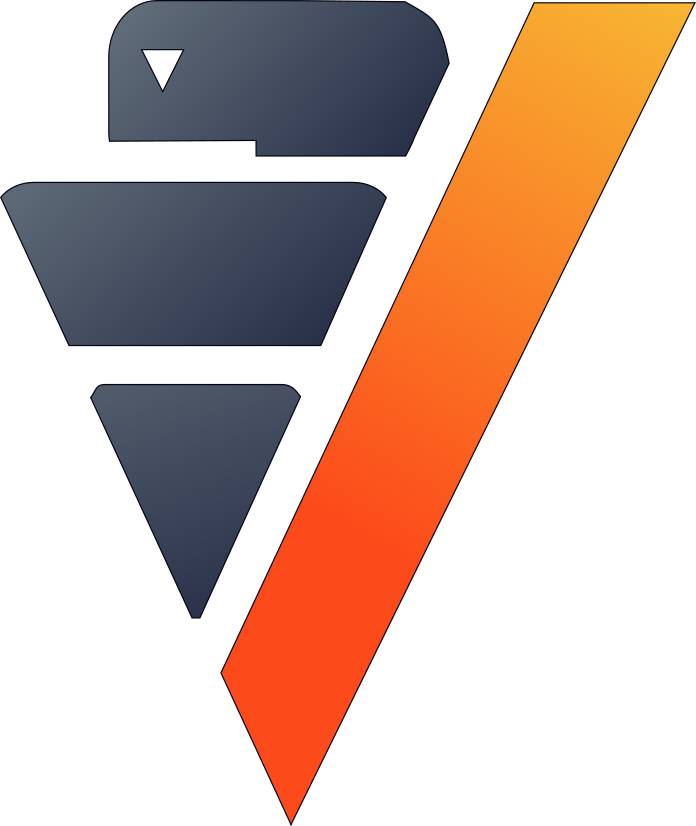

In [1]:
import verticapy as vp

vp.set_option("plotting_lib","highcharts")
vp.drop("public.heart") # To make sure there is no other table with that name
vdf = vp.read_csv("data/heart.csv", schema = "public", table_name = "heart")
display(vdf)

Let's focus on a patient's maximum heart rate (thalach) and the cholesterol (chol) to identify some outliers.

In [2]:
%matplotlib inline
vdf.scatter(["thalach", "chol"])

We can see some outliers of the distribution: people with high cholesterol and others with a very low heart rate. Let's compute the global outliers using the 'outliers' method.

In [3]:
vdf.outliers(["thalach", "chol"], "global_outliers")
vdf.scatter(["thalach", "chol"], by = "global_outliers")

It is also possible to draw an outlier plot using the 'outliers_plot' method.

In [4]:
vdf.outliers_plot(["thalach", "chol"],)

We've detected some global outliers in the distribution and we can impute these with the 'fill_outliers' method.

Generally, you can identify global outliers with the Z-Score. We'll consider a Z-Score greater than 3 indicates that the datapoint is an outlier. Some less precise techniques consider the data points belonging in the first and last alpha-quantile as outliers. You're free to choose either of these strategies when filling outliers.

In [5]:
vdf["thalach"].fill_outliers(use_threshold = True,
                             threshold = 3.0,
                             method = "winsorize")
vdf["chol"].fill_outliers(use_threshold = True,
                          threshold = 3.0,
                          method = "winsorize")
vdf.scatter(["thalach", "chol"], by = "global_outliers")

Other techniques like DBSCAN or local outlier factor (LOF) can be to used to check other data points for outliers.

,123ageInteger,123sexInteger,123cpInteger,123trestbpsInteger,123cholNumeric(34),123fbsInteger,123restecgInteger,123thalachNumeric(33),123exangInteger,123oldpeakNumeric(7),123slopeInteger,123caInteger,123thalInteger,123targetInteger,123global_outliersInteger
1,29,1,1,130,204.0,0,0,202.0,0,0.0,2,0,2,1,0
2,29,1,1,130,204.0,0,0,202.0,0,0.0,2,0,2,1,0
3,29,1,1,130,204.0,0,0,202.0,0,0.0,2,0,2,1,0
4,29,1,1,130,204.0,0,0,202.0,0,0.0,2,0,2,1,0
5,34,0,1,118,210.0,0,1,192.0,0,0.7,2,0,2,1,0
6,34,0,1,118,210.0,0,1,192.0,0,0.7,2,0,2,1,0
7,34,0,1,118,210.0,0,1,192.0,0,0.7,2,0,2,1,0
8,34,1,3,118,182.0,0,0,174.0,0,0.0,2,0,2,1,0
9,34,1,3,118,182.0,0,0,174.0,0,0.0,2,0,2,1,0
10,34,1,3,118,182.0,0,0,174.0,0,0.0,2,0,2,1,0

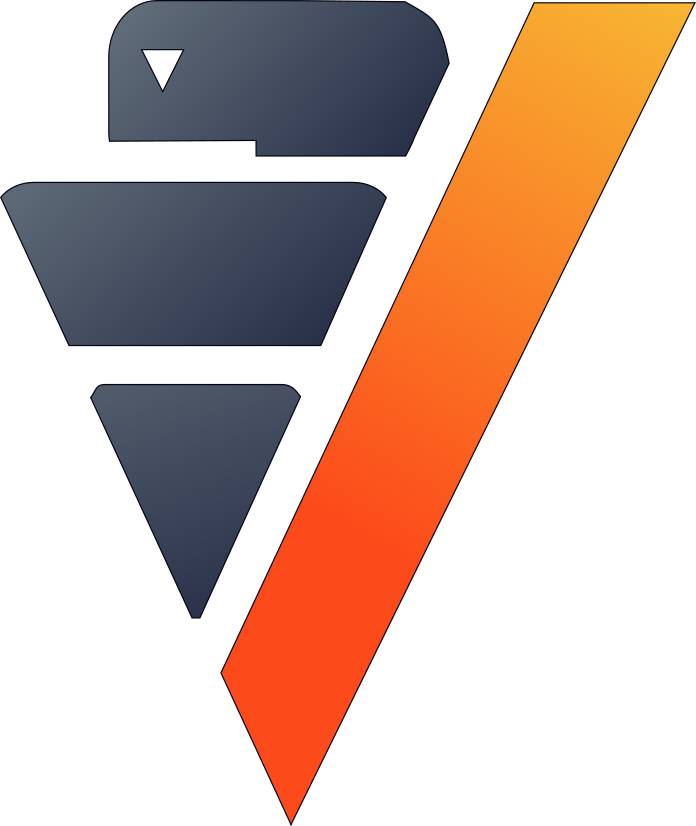

In [6]:
vdf

In [7]:
from verticapy.learn.cluster import DBSCAN

vp.drop("dbscan_heart")
model = DBSCAN("dbscan_heart", eps = 20, min_samples = 10)
model.fit("public.heart", ["thalach", "chol"])
model.plot()

/opt/venv/lib/python3.10/site-packages/vertica_python/vertica/connection.py:659: UserWarning: [INFO] Cannot commit; no transaction in progress
  warnings.warn(notice)


In [8]:
vdf_tmp = model.predict()
vdf_tmp["outliers_dbscan"] = "(dbscan_cluster = -1)::int"
vdf_tmp.scatter(["thalach", "chol"], by = "outliers_dbscan")

While DBSCAN identifies outliers when computing the clusters, LOF computes an outlier score. Generally, a LOF Score greater than 1.5 indicates an outlier.

In [9]:
from verticapy.learn.neighbors import LocalOutlierFactor

vp.drop("lof_heart")
model = LocalOutlierFactor("lof_heart")
model.fit("heart", ["thalach", "chol",])
model.plot()

In [10]:
lof_heart = model.predict()
lof_heart["outliers"] = "(CASE WHEN lof_score > 1.5 THEN 1 ELSE 0 END)"
lof_heart.scatter(["thalach", "chol"], by = "outliers")

We have many other techniques like the k-means clustering for finding outliers, but the most important method is using the Z-Score. After identifying outliers, we just have to decide how to impute the missing values. We'll focus on missing values in the next lesson.